# Olist : E-commerce Customer Segmentation
## EDA and Data Preparation

<b>Dataset description</b> 

Olist is the largest department store in Brazil, and thez have generously provided us with a public e-commerce dataset of orders, products, reviews, geolocation data, and others.

We have access to approximately 100 000 orders from 2016 to 2018 to multiple sellers, who represent small businesses all over Brazil selling and shipping their products directly via Olist.

In [482]:
# importing necessary librairies

import pandas as pd # data manipulation
import numpy as np # calculations
from matplotlib import pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import missingno as msno # for missing data visualization
from wordcloud import WordCloud
import datetime

In [419]:
# importing the dataset files

customers = pd.read_csv("archive\olist_customers_dataset.csv")
geolocation = pd.read_csv("archive\olist_geolocation_dataset.csv")
order_items = pd.read_csv("archive\olist_order_items_dataset.csv")
payments = pd.read_csv("archive\olist_order_payments_dataset.csv")
reviews = pd.read_csv("archive\olist_order_reviews_dataset.csv")
orders = pd.read_csv("archive\olist_orders_dataset.csv")
products = pd.read_csv("archive\olist_products_dataset.csv")
sellers = pd.read_csv("archive\olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("archive\product_category_name_translation.csv")

### Exploring the dataset

#### Database scheme

We are given 8 files which we will analyze, clean and finally merge together.

![database scheme](scheme.png)

#### Customers

In [420]:
print("The dataframe contains " + str(customers.shape[0]) + " rows and " + str(customers.shape[1]) + " columns.")
customers.head()

The dataframe contains 99441 rows and 5 columns.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


The customer_id is a temporary ID generated at each order while the customer_unique_id is generated once at customer signup and it it used to identify customers in the system.

In [421]:
unique = (customers.shape[0] - customers["customer_unique_id"].nunique()) / customers.shape[0]
print("There are only " + str(round(unique*100,2)) + "% returning customers.")

There are only 3.36% returning customers.


In [422]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [423]:
print("There are " + str(customers["customer_city"].nunique()) + " cities and " + str(customers["customer_state"].nunique()) + " states in the dataset.")

There are 4119 cities and 27 states in the dataset.


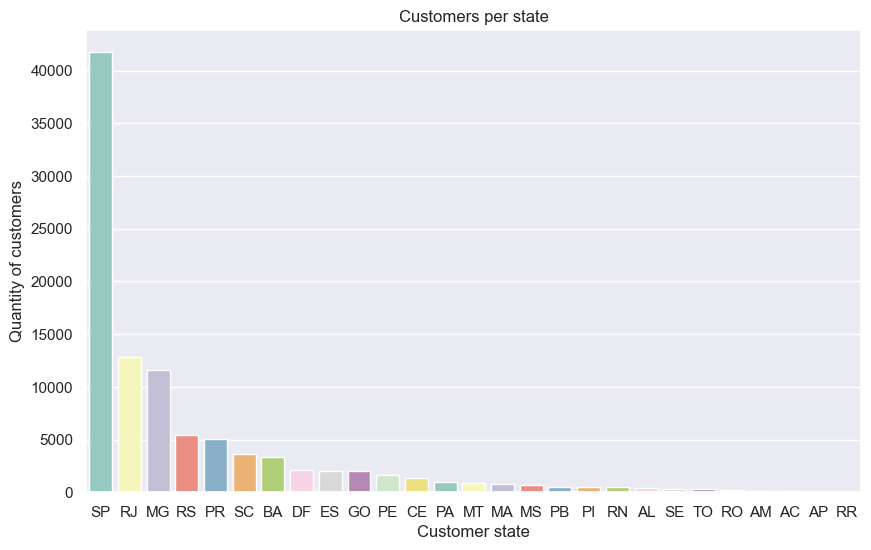

In [424]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10,6))
ax = sns.countplot(x="customer_state", data=customers, palette="Set3", order = customers["customer_state"].value_counts().index)
ax.set_title("Customers per state")
ax.set_xlabel("Customer state")
ax.set_ylabel("Quantity of customers")
plt.show()

#### Products

In [425]:
print("The dataframe contains " + str(products.shape[0]) + " rows and " + str(products.shape[1]) + " columns.")
products.head()

The dataframe contains 32951 rows and 9 columns.


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [426]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [427]:
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [428]:
products = products.merge(product_category_name_translation, on=["product_category_name"], how="inner")

In [429]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


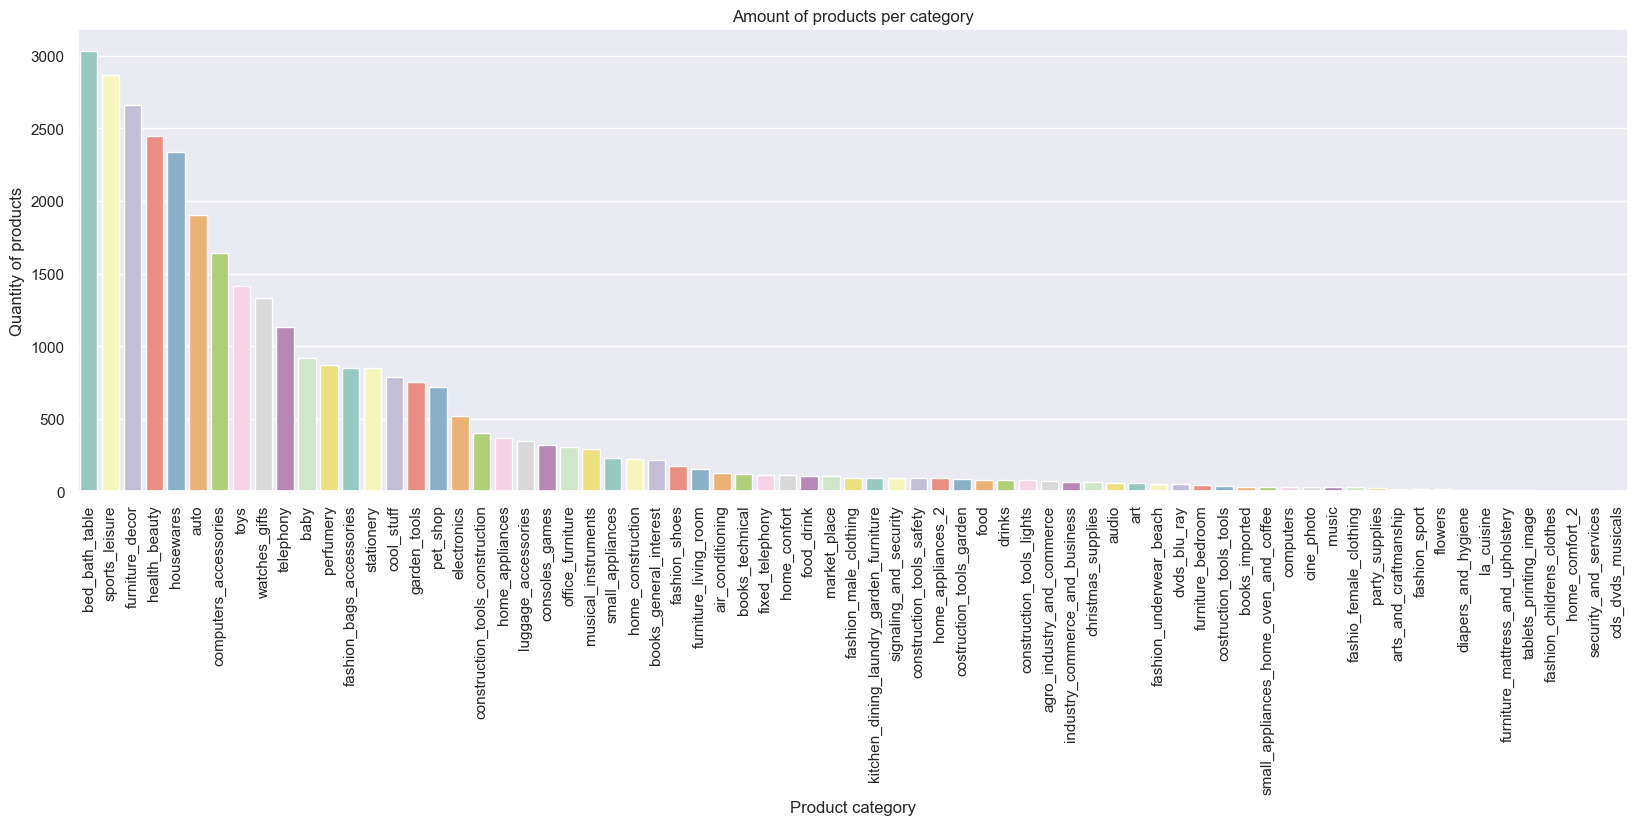

In [430]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,6))
ax = sns.countplot(x="product_category_name_english", data=products, palette="Set3", order = products["product_category_name_english"].value_counts().index)
ax.set_title("Amount of products per category")
ax.set_xlabel("Product category")
plt.xticks(rotation=90)
ax.set_ylabel("Quantity of products")
plt.show()

#### Orders

In [431]:
print("The dataframe contains " + str(orders.shape[0]) + " rows and " + str(orders.shape[1]) + " columns.")
orders.head()

The dataframe contains 99441 rows and 8 columns.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [432]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [433]:
# engineering features
from datetime import datetime as dt
orders['diff_app_pur'] = (pd.to_datetime(orders.order_approved_at) - pd.to_datetime(orders.order_purchase_timestamp)).dt.seconds
orders['diff_car_app'] = (pd.to_datetime(orders.order_delivered_carrier_date) - pd.to_datetime(orders.order_approved_at)).dt.days
orders['diff_del_car'] = (pd.to_datetime(orders.order_delivered_customer_date) - pd.to_datetime(orders.order_delivered_carrier_date)).dt.days
orders['diff_est_act'] = (pd.to_datetime(orders.order_estimated_delivery_date) - pd.to_datetime(orders.order_delivered_customer_date)).dt.days

In [434]:
print(str.format('Average time taken for the order to get approved: {:.2f} seconds', orders.diff_app_pur.mean()))
print(str.format('Average time taken for the order to be passed to the logistic partner: {:.0f} days', orders.diff_car_app.mean()))
print(str.format('Average time taken for the order to be delivered by the logistic partner: {:.0f} days', orders.diff_del_car.mean()))
print(str.format('Average time taken between estimated delivery date and actual delivery date: {:.0f} days', orders.diff_est_act.mean()))

Average time taken for the order to get approved: 14198.03 seconds
Average time taken for the order to be passed to the logistic partner: 2 days
Average time taken for the order to be delivered by the logistic partner: 9 days
Average time taken between estimated delivery date and actual delivery date: 11 days


#### Order items

In [435]:
print("The dataframe contains " + str(order_items.shape[0]) + " rows and " + str(order_items.shape[1]) + " columns.")
order_items.head()

The dataframe contains 112650 rows and 7 columns.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [436]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [437]:
order_items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

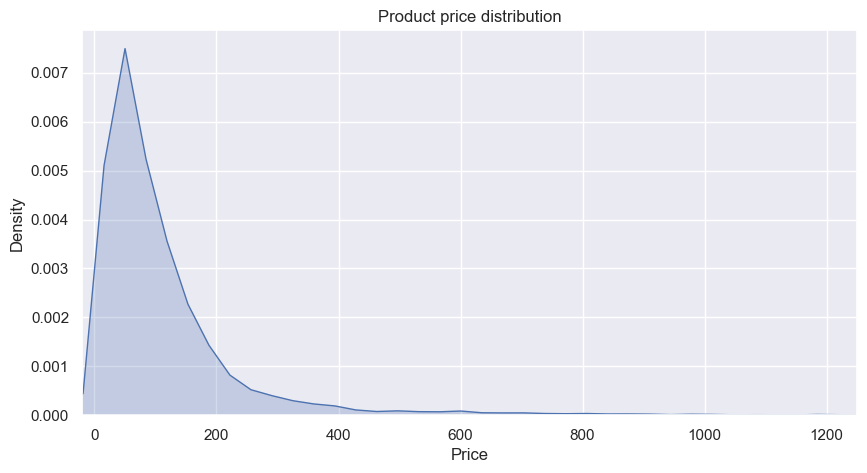

In [438]:
plt.figure(figsize=(10,5))
plt.xlim(-20,1250)
plt.title('Product price distribution')
plt.xlabel('Price')
plt.ylabel('Density')
sns.kdeplot(order_items['price'],shade=True)
plt.show()

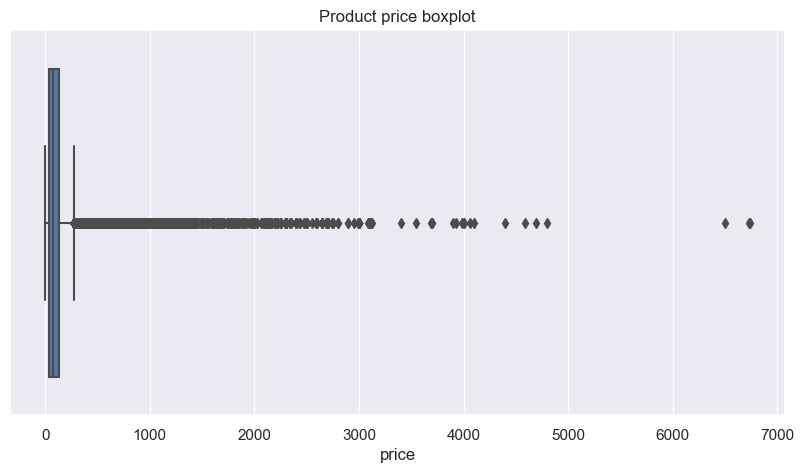

In [439]:
plt.figure(figsize=(10,5))
plt.title('Product price boxplot')
plt.xlabel('Price')
sns.boxplot(x=order_items['price'])
plt.show()

In [440]:
order_items['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

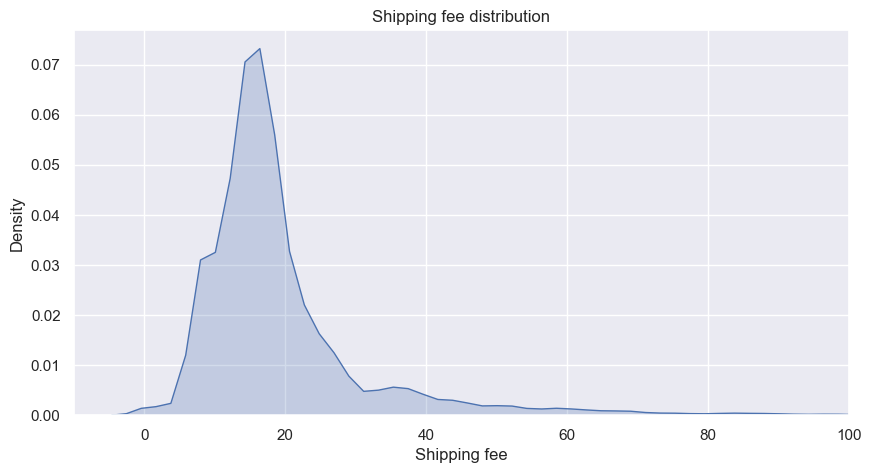

In [441]:
plt.figure(figsize=(10,5))
plt.xlim(-10,100)
plt.title('Shipping fee distribution')
plt.xlabel('Shipping fee')
plt.ylabel('Density')
sns.kdeplot(order_items['freight_value'],shade=True)
plt.show()

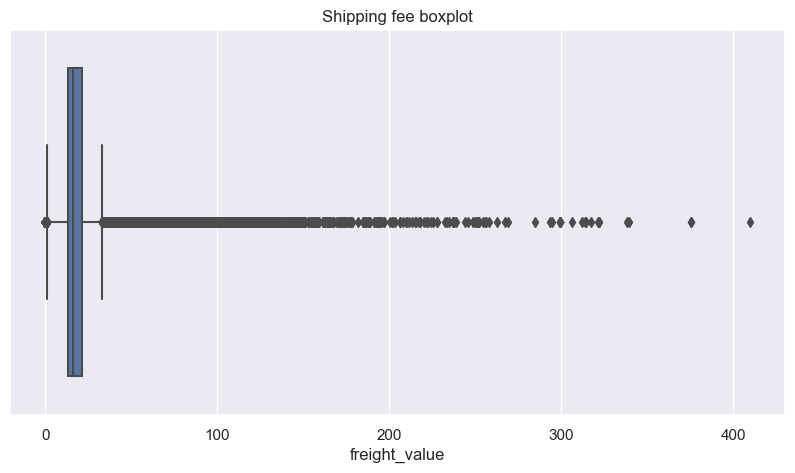

In [442]:
plt.figure(figsize=(10,5))
plt.title('Shipping fee boxplot')
plt.xlabel('Shipping fee')
sns.boxplot(x=order_items['freight_value'])
plt.show()

#### Reviews

In [443]:
print("The dataframe contains " + str(reviews.shape[0]) + " rows and " + str(reviews.shape[1]) + " columns.")
reviews.head()

The dataframe contains 99224 rows and 7 columns.


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [444]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

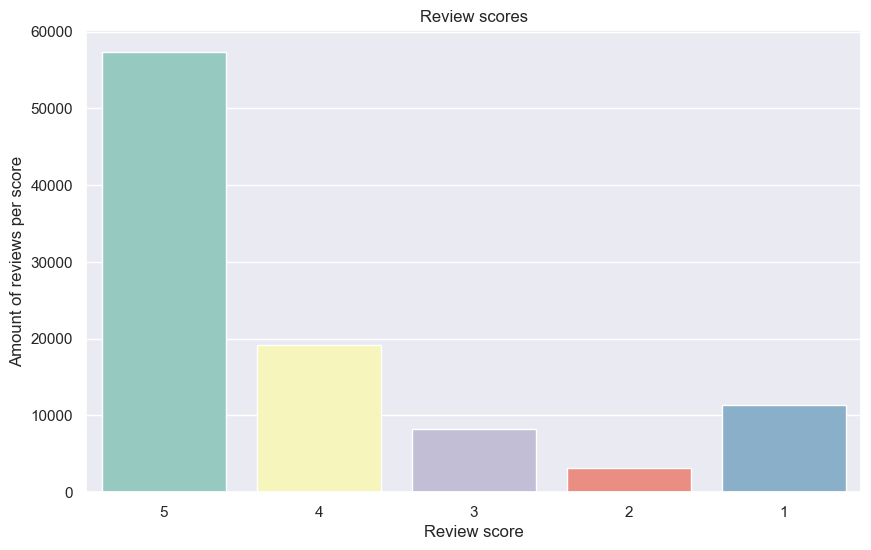

In [445]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10,6))
ax = sns.countplot(x="review_score", data=reviews, palette="Set3", order = [5, 4, 3, 2, 1])
ax.set_title("Review scores")
ax.set_xlabel("Review score")
ax.set_ylabel("Amount of reviews per score")
plt.show()

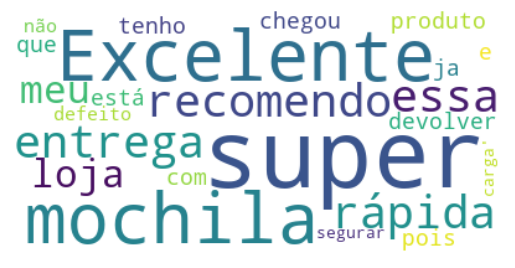

In [446]:
word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=["nan", "na", "n"]).generate(str(reviews["review_comment_message"].values))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [447]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


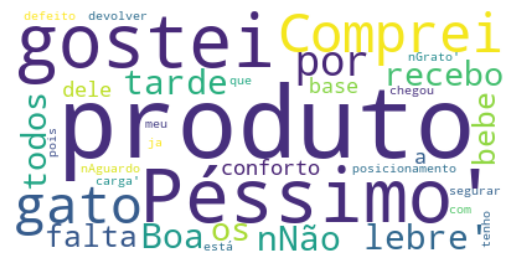

In [448]:
score_1 = reviews[reviews["review_score"]==1]
word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=["nan", "na", "n", "o", "e", "r", "não"]).generate(str(score_1["review_comment_message"].values))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

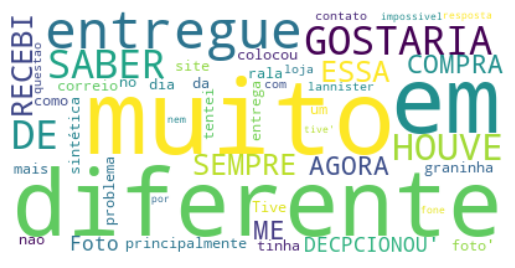

In [449]:
score_2 = reviews[reviews["review_score"]==2]
word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=["nan", "na", "n", "o", "e", "r", "a", "QUE"]).generate(str(score_2["review_comment_message"].values))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

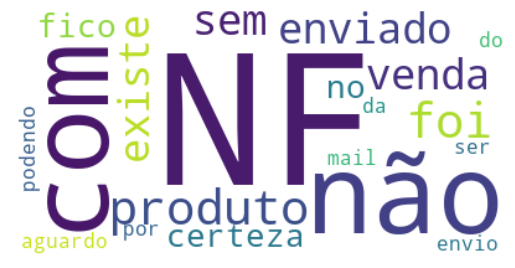

In [450]:
score_3 = reviews[reviews["review_score"]==3]
word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=["nan", "na", "n", "o", "e", "r"]).generate(str(score_3["review_comment_message"].values))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

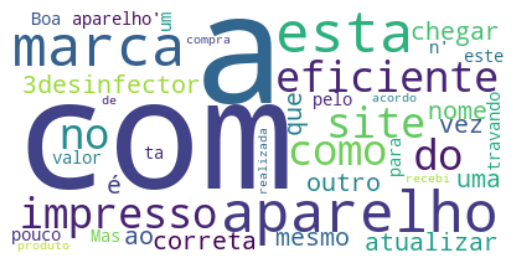

In [451]:
score_4 = reviews[reviews["review_score"]==4]
word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=["nan", "na", "n", "o", "e", "r"]).generate(str(score_4["review_comment_message"].values))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

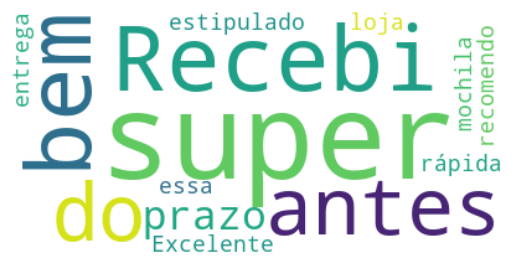

In [452]:
score_5 = reviews[reviews["review_score"]==5]
word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords=["nan", "na", "n", "o", "e", "r"]).generate(str(score_5["review_comment_message"].values))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Sellers

In [453]:
print("The dataframe contains " + str(sellers.shape[0]) + " rows and " + str(sellers.shape[1]) + " columns.")
sellers.head()

The dataframe contains 3095 rows and 4 columns.


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [454]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

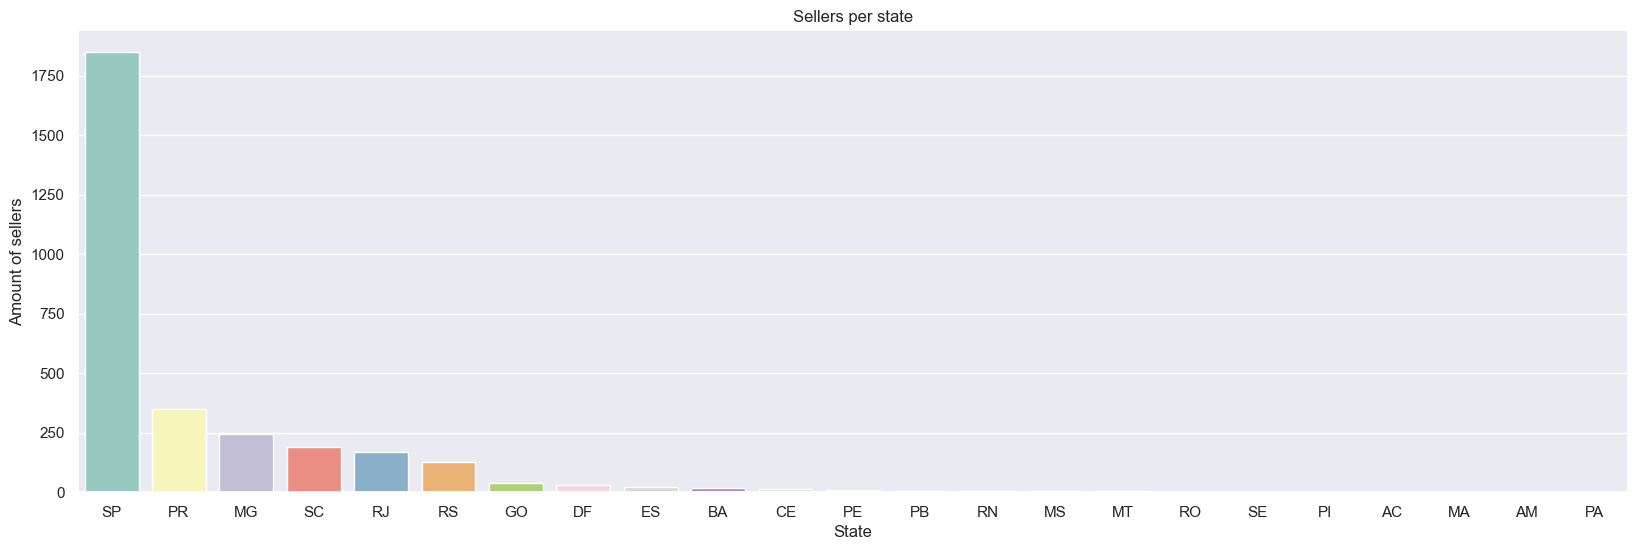

In [455]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,6))
ax = sns.countplot(x="seller_state", data=sellers, palette="Set3", order = sellers["seller_state"].value_counts().index)
ax.set_title("Sellers per state")
ax.set_xlabel("State")
ax.set_ylabel("Amount of sellers")
plt.show()

#### Geolocation

In [456]:
print("The dataframe contains " + str(geolocation.shape[0]) + " rows and " + str(geolocation.shape[1]) + " columns.")
geolocation.head()

The dataframe contains 1000163 rows and 5 columns.


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [457]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### Payment

In [458]:
print("The dataframe contains " + str(payments.shape[0]) + " rows and " + str(payments.shape[1]) + " columns.")
payments.head()

The dataframe contains 103886 rows and 5 columns.


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [459]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

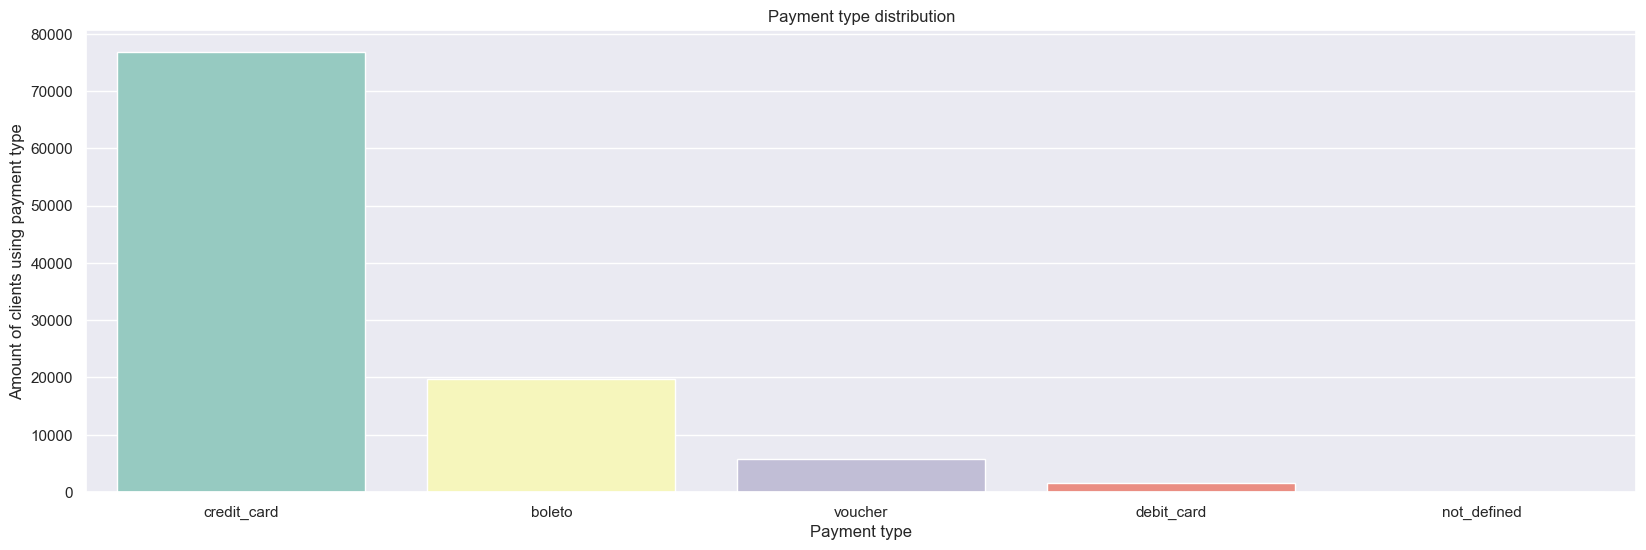

In [460]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,6))
ax = sns.countplot(x="payment_type", data=payments, palette="Set3", order = payments["payment_type"].value_counts().index)
ax.set_title("Payment type distribution")
ax.set_xlabel("Payment type")
ax.set_ylabel("Amount of clients using payment type")
plt.show()

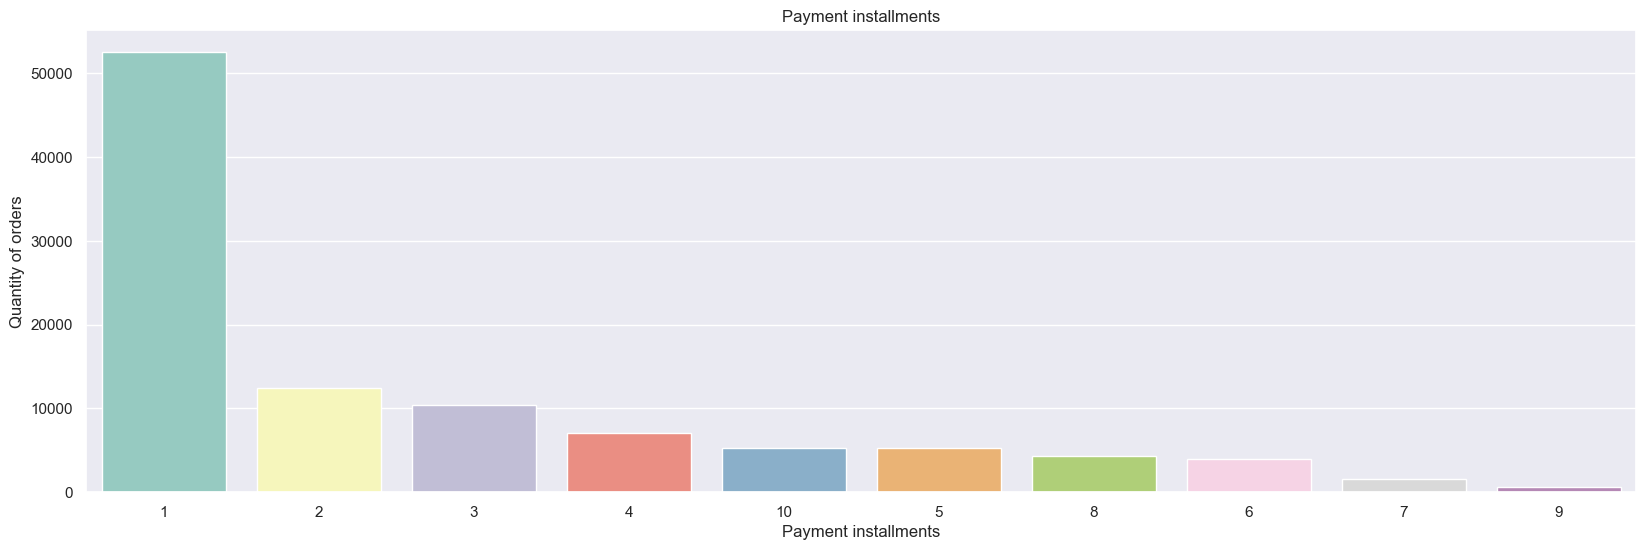

In [461]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,6))
ax = sns.countplot(x="payment_installments", data=payments, palette="Set3", order = [1, 2, 3, 4, 10, 5, 8, 6, 7, 9])
ax.set_title("Payment installments")
ax.set_xlabel("Payment installments")
ax.set_ylabel("Quantity of orders")
plt.show()

In [462]:
payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

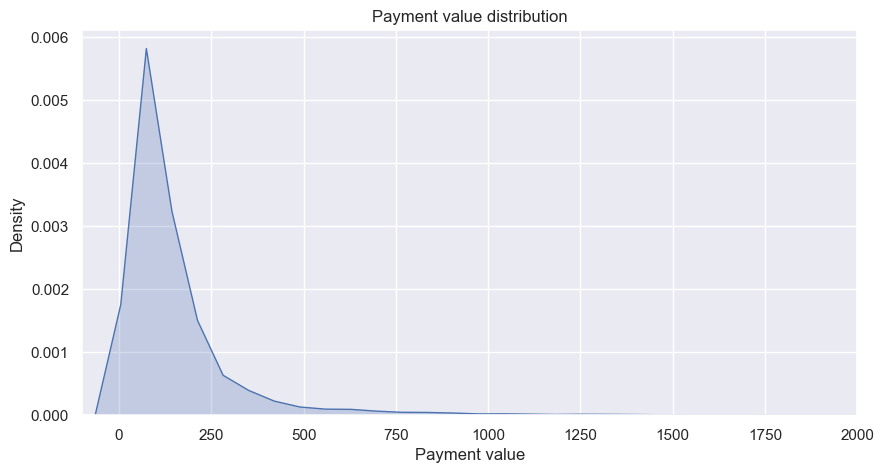

In [463]:
plt.figure(figsize=(10,5))
plt.xlim(-100,2000)
plt.title('Payment value distribution')
plt.xlabel('Payment value')
plt.ylabel('Density')
sns.kdeplot(payments['payment_value'],shade=True)
plt.show()

### Merging the dataframes

We will merge the dataframes on customer ID, order ID, product ID or seller ID, based on the schematic from the beginning of the notebook.

In [464]:
cust_order_id_df_pd = customers.merge(orders, on=["customer_id"], how="inner")
cust_product_id_df_pd = cust_order_id_df_pd.merge(order_items, on=["order_id"], how="inner")
cust_payments_df_pd = cust_product_id_df_pd.merge(payments, on=["order_id"], how="inner")
cust_products_df_pd = cust_payments_df_pd.merge(products, on=["product_id"], how="inner")
cust_sellers_df_pd = cust_products_df_pd.merge(sellers, on=["seller_id"], how="inner")
df = cust_sellers_df_pd.merge(reviews, on=["order_id"], how="inner")

In [465]:
print("We are left with " + str(df.shape[0]) + " individuals and " + str(df.shape[1]) + " columns.")

We are left with 115609 individuals and 44 columns.


In [466]:
# Fixing some typos in the column names
df = df.rename(
    columns={
        "product_name_lenght": "product_name_length",
        "product_description_lenght": "product_description_length",
        "product_category_name_english": "product_category_name_en"
    })

<AxesSubplot:>

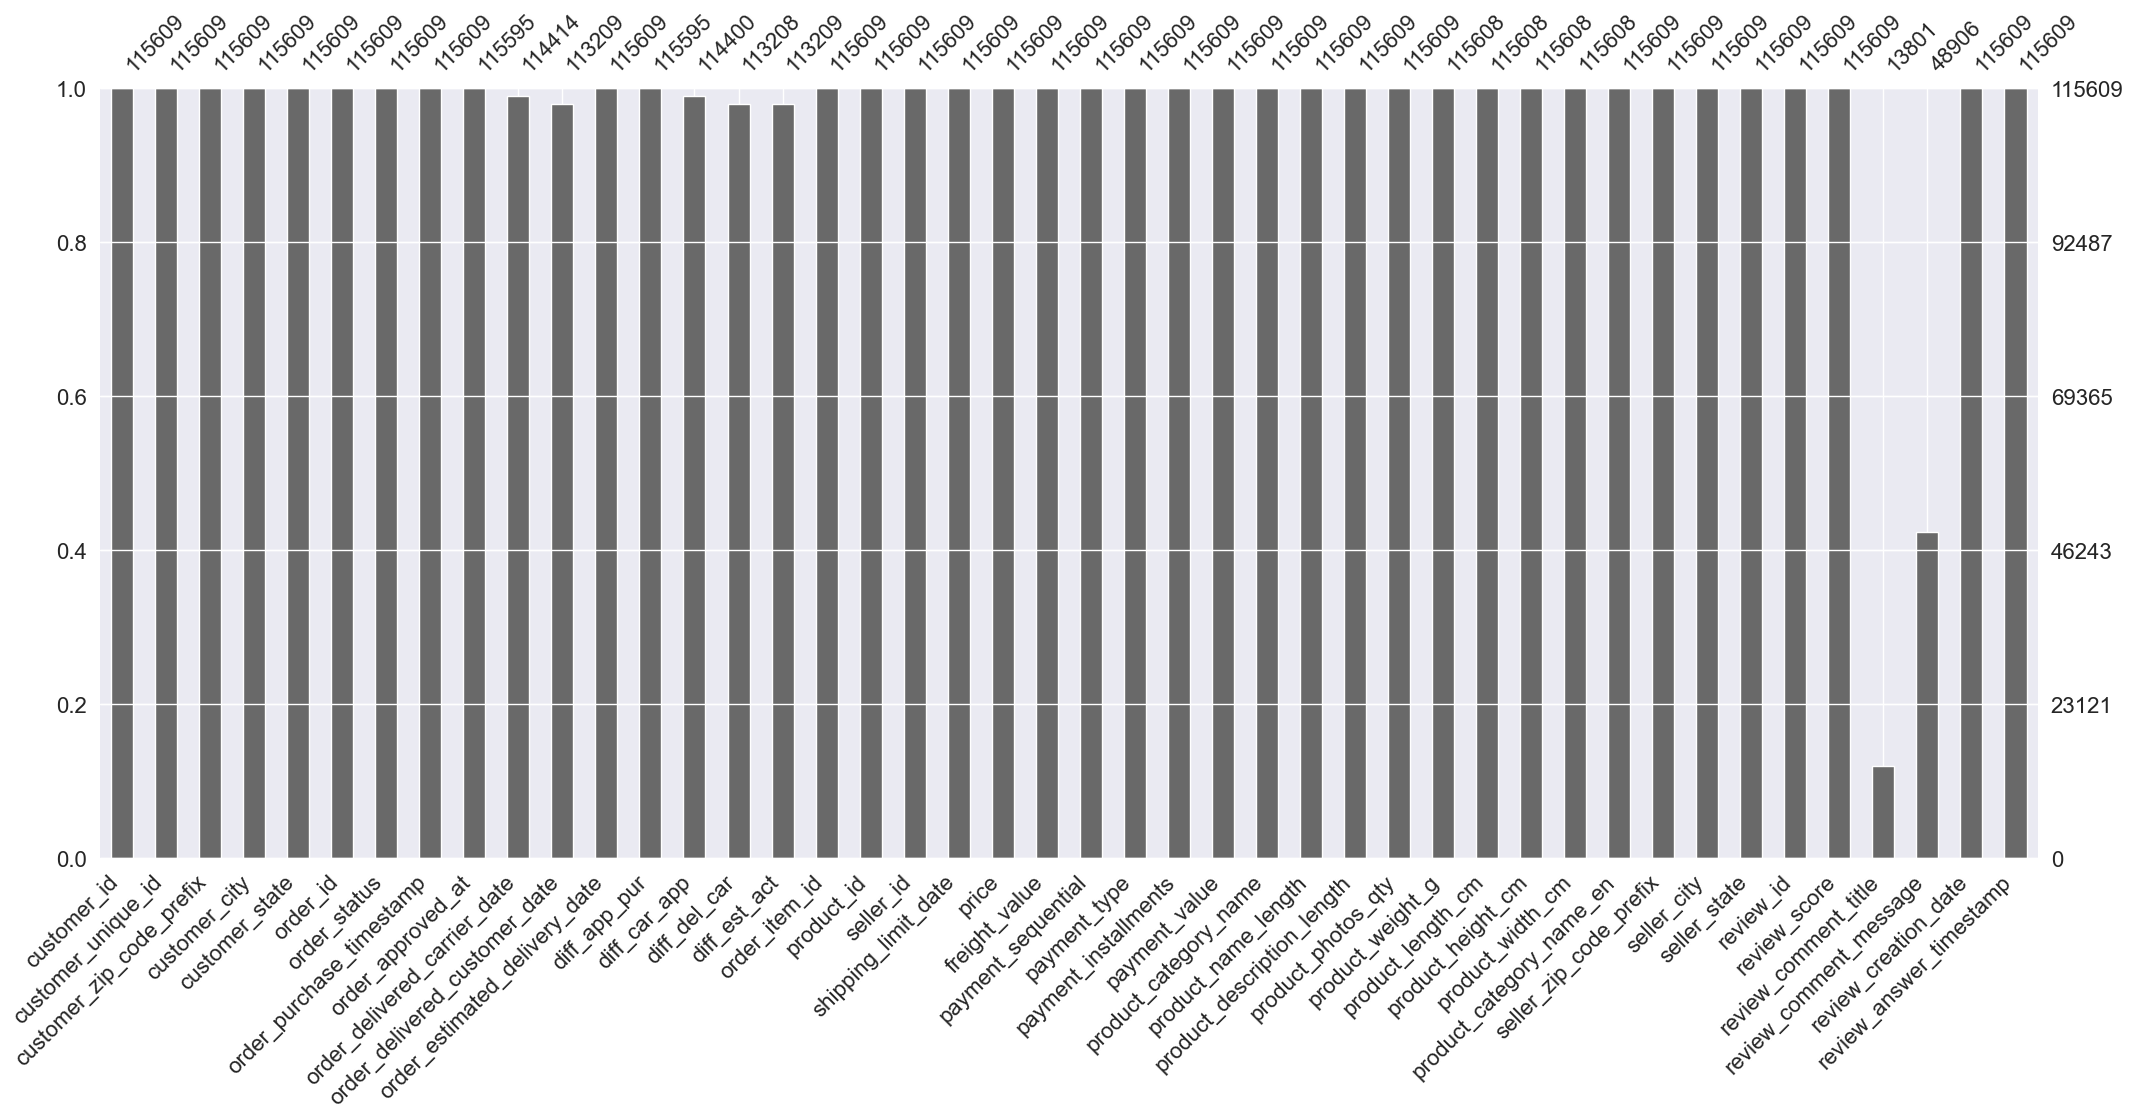

In [467]:
msno.bar(df)

We will drop any duplicate in order ID, customer unique ID or order purchase timestamp.

In [468]:
df = df.drop_duplicates(subset=["order_id", "customer_unique_id", "order_purchase_timestamp"])

We will remove the columns with review title and review comment as they will not be useful for us moving forward. Then we'll drop any individuals with missing values.

In [469]:
df = df.drop(columns=["review_comment_title", "review_comment_message"])
df = df.dropna(axis="rows", how="any")

In [470]:
df.shape

(94471, 42)

In [471]:
df.dtypes.value_counts()

object     22
float64    14
int64       6
dtype: int64

In [472]:
df.describe()

,customer_zip_code_prefix,diff_app_pur,diff_car_app,diff_del_car,diff_est_act,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score
count,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000,94471.000000
mean,35200.541351,14165.189974,2.283611,8.846535,10.921510,1.017042,125.093228,20.163094,1.022314,2.915837,157.152057,48.884028,793.238846,2.250373,2100.539711,30.126018,16.460438,23.045527,24694.913010,4.157615
std,29847.619584,23623.969448,3.504834,8.667640,10.112348,0.151928,188.171364,15.810467,0.233006,2.709302,215.050028,9.974991,653.601884,1.745732,3753.434134,16.114399,13.295971,11.721743,27765.367699,1.283120
min,1003.000000,0.000000,-172.000000,-17.000000,-189.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.010000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000
25%,11360.000000,756.000000,0.000000,4.000000,6.000000,1.000000,41.800000,13.270000,1.000000,1.000000,60.000000,43.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000
50%,24431.000000,1171.000000,1.000000,7.000000,11.000000,1.000000,79.000000,16.380000,1.000000,2.000000,103.040000,52.000000,607.000000,2.000000,700.000000,25.000000,13.000000,20.000000,13613.000000,5.000000
75%,59056.000000,17024.000000,3.000000,12.000000,16.000000,1.000000,139.900000,21.220000,1.000000,4.000000,174.885000,57.000000,995.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,29156.000000,5.000000
max,99980.000000,86399.000000,107.000000,205.000000,146.000000,9.000000,6735.000000,409.680000,19.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000


### Multivariate analysis

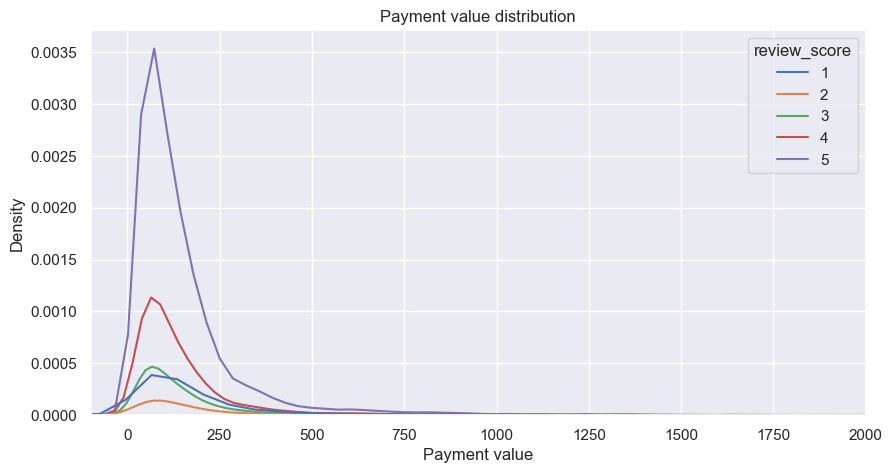

In [474]:
plt.figure(figsize=(10,5))
plt.xlim(-100,2000)
plt.title('Payment value distribution')
plt.xlabel('Payment value')
plt.ylabel('Density')

sns.kdeplot(data=df, x="payment_value", hue="review_score", palette="deep")

plt.show()

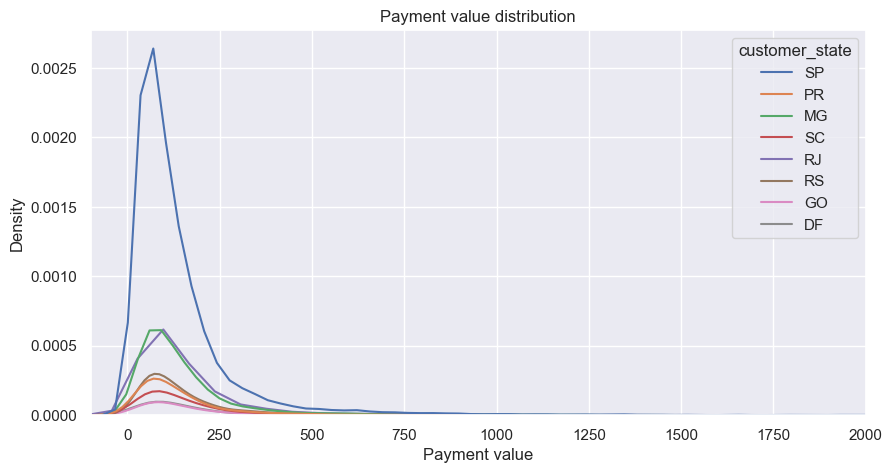

In [475]:
plt.figure(figsize=(10,5))
plt.xlim(-100,2000)
plt.title('Payment value distribution')
plt.xlabel('Payment value')
plt.ylabel('Density')
hue_order = ["SP", "PR", "MG", "SC", "RJ", "RS", "GO", "DF"]
sns.kdeplot(data=df, x="payment_value", hue="customer_state", palette="deep", hue_order=hue_order)

plt.show()

In [476]:
df["product_id"].nunique()

30219

### Effect of different variables on customer satisfaction

In [477]:
df["diff_rec_rev"] = (pd.to_datetime(df.order_delivered_customer_date) - pd.to_datetime(df.review_creation_date)).dt.days
drop_cols = ["customer_zip_code_prefix", "order_item_id", "seller_zip_code_prefix"]
df.drop(columns=drop_cols).groupby(by="review_score").mean()

,diff_app_pur,diff_car_app,diff_del_car,diff_est_act,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,diff_rec_rev
review_score,,,,,,,,,,,,,,,,,
1,14479.305680,3.761147,16.183364,3.031178,135.556861,21.596406,1.024092,3.200044,190.886190,49.042952,782.573095,2.157855,2367.312439,30.692794,17.142265,23.309495,2.930339
2,14138.286558,3.047933,12.111844,7.672456,122.043307,21.182213,1.024661,3.063216,165.300872,49.235846,736.604724,2.212574,2345.101771,31.009378,16.819382,23.634248,0.599861
3,14548.578443,2.634957,10.208158,9.788390,113.964796,20.402694,1.019563,2.933512,149.096888,49.261603,775.634062,2.269531,2182.380770,30.619742,16.540340,23.359545,-0.401355
4,14188.400806,2.281838,8.634336,11.381784,122.346439,20.270595,1.020742,2.814508,152.144164,49.162654,797.972757,2.278023,2123.512950,30.412628,16.456475,23.102579,-0.822300
5,14053.838197,1.953740,7.356898,12.386619,126.003262,19.806654,1.022808,2.892906,153.995894,48.694542,798.784239,2.255608,2025.187647,29.823498,16.320426,22.909177,-0.957259


Insights from this table : 
- The more time passes between the order approval and carrier delivery date, the lower the review.
- The more time passes between the order delivered customer date and olrder delivered carrier date, the lower the review (significant)
- The more time passes between the estimated delivery date and the order delivered customer date, the higher the review (interesting)
- The higher the freight value, the lower the review
- The more payment installments, the lower the review (more expensive => higher expectations?)
- The higher the payment, the lower the review (higher expectations?)
- The heavier the product, the lower the review
- The longer a client takes to review a product, the lower the review

In [481]:
# Feature engineering

# retard de livraison : delta entre la date prevue et la date effective de livraison
# date d'achat de livraison difference
# score moyen

In [ ]:
# low variance

In [478]:
# Save the merged dataframe for the next notebook 
df.to_csv('data.csv')